# Analyse GEOtop output time series
---
Author: Elisa Bortoli (elisa.bortoli3@gmail.com) 

Date: 28/03/2019

## Load output data

###  point0001.txt

In [1]:
# import necessary packages
import os

# import urllib.request

import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import matplotlib.pyplot as plt

# make figures plot inline
plt.ion()

In [2]:
# set standard plot parameters for uniform plotting
plt.rcParams['figure.figsize'] = (10, 6)

# prettier plotting with seaborn
import seaborn as sns; 
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [3]:
test_path = "/home/elisa/Scrivania/MHPC/geotop_3.0/tests/1D/Matsch_B2_Ref_007/"
file_path = test_path + "output-tabs/point0001.txt"

# import file into pandas dataframe
point_df = pd.read_csv(file_path)

# view first few rows of the data
point_df.head()

,Date12[DDMMYYYYhhmm],JulianDayFromYear0[days],TimeFromStart[days],Simulation_Period,Run,IDpoint,Psnow_over_canopy[mm],Prain_over_canopy[mm],Psnow_under_canopy[mm],Prain_under_canopy[mm],...,glac_depth[mm],glac_water_equivalent[mm],glac_density[kg/m3],glac_temperature[C],glac_melted[mm],glac_subl[mm],lowest_thawed_soil_depth[mm],highest_thawed_soil_depth[mm],lowest_water_table_depth[mm],highest_water_table_depth[mm]
0,02/10/2009 01:00,734048.041667,0.041667,1,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0,1000.0
1,02/10/2009 02:00,734048.083333,0.083333,1,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0,1000.0
2,02/10/2009 03:00,734048.125000,0.125000,1,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0,1000.0
3,02/10/2009 04:00,734048.166667,0.166667,1,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0,1000.0
4,02/10/2009 05:00,734048.208333,0.208333,1,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0,1000.0


In [4]:
# import file into pandas dataframe, identifying the date column to be converted to datetime
point_df_datetime = pd.read_csv(file_path,
                                parse_dates = ['Date12[DDMMYYYYhhmm]'], # Date format is correct
                                index_col = ['Date12[DDMMYYYYhhmm]'], # No more element indexes
                                dayfirst = True) # Coherent date format
point_df_datetime.head() 

,JulianDayFromYear0[days],TimeFromStart[days],Simulation_Period,Run,IDpoint,Psnow_over_canopy[mm],Prain_over_canopy[mm],Psnow_under_canopy[mm],Prain_under_canopy[mm],Prain_rain_on_snow[mm],...,glac_depth[mm],glac_water_equivalent[mm],glac_density[kg/m3],glac_temperature[C],glac_melted[mm],glac_subl[mm],lowest_thawed_soil_depth[mm],highest_thawed_soil_depth[mm],lowest_water_table_depth[mm],highest_water_table_depth[mm]
Date12[DDMMYYYYhhmm],,,,,,,,,,,,,,,,,,,,,
2009-10-02 01:00:00,734048.041667,0.041667,1,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0,1000.0
2009-10-02 02:00:00,734048.083333,0.083333,1,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0,1000.0
2009-10-02 03:00:00,734048.125000,0.125000,1,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0,1000.0
2009-10-02 04:00:00,734048.166667,0.166667,1,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0,1000.0
2009-10-02 05:00:00,734048.208333,0.208333,1,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,1000.0,1000.0


In [5]:
# view all the columns headers
list(point_df_datetime)

['JulianDayFromYear0[days]',
 'TimeFromStart[days]',
 'Simulation_Period',
 'Run',
 'IDpoint',
 'Psnow_over_canopy[mm]',
 'Prain_over_canopy[mm]',
 'Psnow_under_canopy[mm]',
 'Prain_under_canopy[mm]',
 'Prain_rain_on_snow[mm]',
 'Wind_speed[m/s]',
 'Wind_direction[deg]',
 'Relative_Humidity[-]',
 'Pressure[mbar]',
 'Tair[C]',
 'Tdew[C]',
 'Tsurface[C]',
 'Tvegetation[C]',
 'Tcanopyair[C]',
 'Surface_Energy_balance[W/m2]',
 'Soil_heat_flux[W/m2]',
 'SWin[W/m2]',
 'SWbeam[W/m2]',
 'SWdiff[W/m2]',
 'LWin[W/m2]',
 'LWin_min[W/m2]',
 'LWin_max[W/m2]',
 'SWnet[W/m2]',
 'LWnet[W/m2]',
 'H[W/m2]',
 'LE[W/m2]',
 'Canopy_fraction[-]',
 'LSAI[m2/m2]',
 'z0veg[m]',
 'd0veg[m]',
 'Estored_canopy[W/m2]',
 'SWv[W/m2]',
 'LWv[W/m2]',
 'Hv[W/m2]',
 'LEv[W/m2]',
 'Hg_unveg[W/m2]',
 'LEg_unveg[W/m2]',
 'Hg_veg[W/m2]',
 'LEg_veg[W/m2]',
 'Evap_surface[mm]',
 'Trasp_canopy[mm]',
 'Water_on_canopy[mm]',
 'Snow_on_canopy[mm]',
 'Qvegetation[-]',
 'Qsurface[-]',
 'Qair[-]',
 'Qcanopyair[-]',
 'LObukhov[m]',
 

In [6]:
# view all the variables types of the columns
point_df_datetime.dtypes

JulianDayFromYear0[days]         float64
TimeFromStart[days]              float64
Simulation_Period                  int64
Run                                int64
IDpoint                            int64
Psnow_over_canopy[mm]            float64
Prain_over_canopy[mm]            float64
Psnow_under_canopy[mm]           float64
Prain_under_canopy[mm]           float64
Prain_rain_on_snow[mm]           float64
Wind_speed[m/s]                  float64
Wind_direction[deg]              float64
Relative_Humidity[-]             float64
Pressure[mbar]                   float64
Tair[C]                          float64
Tdew[C]                          float64
Tsurface[C]                      float64
Tvegetation[C]                   float64
Tcanopyair[C]                    float64
Surface_Energy_balance[W/m2]     float64
Soil_heat_flux[W/m2]             float64
SWin[W/m2]                       float64
SWbeam[W/m2]                     float64
SWdiff[W/m2]                     float64
LWin[W/m2]      

In [7]:
# view data index
print("point_df_datetime.index = \n", point_df_datetime.index, "\n")

point_df_datetime.index = 
 DatetimeIndex(['2009-10-02 01:00:00', '2009-10-02 02:00:00',
               '2009-10-02 03:00:00', '2009-10-02 04:00:00',
               '2009-10-02 05:00:00', '2009-10-02 06:00:00',
               '2009-10-02 07:00:00', '2009-10-02 08:00:00',
               '2009-10-02 09:00:00', '2009-10-02 10:00:00',
               ...
               '2009-11-01 15:00:00', '2009-11-01 16:00:00',
               '2009-11-01 17:00:00', '2009-11-01 18:00:00',
               '2009-11-01 19:00:00', '2009-11-01 20:00:00',
               '2009-11-01 21:00:00', '2009-11-01 22:00:00',
               '2009-11-01 23:00:00', '2009-11-02 00:00:00'],
              dtype='datetime64[ns]', name='Date12[DDMMYYYYhhmm]', length=744, freq=None) 



## Plot the desired parameter

###  Air Temperature

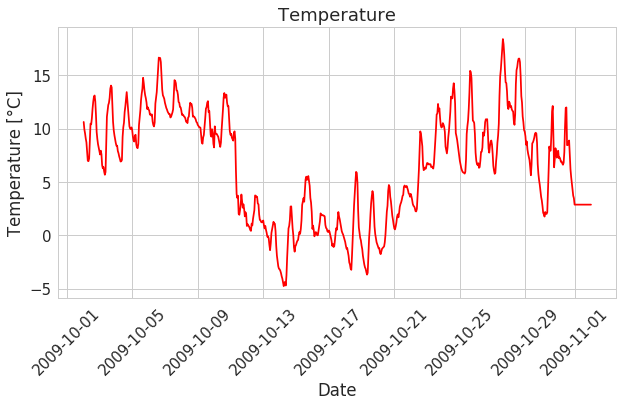

In [8]:
# create the plot space upon which to plot the data
fig, ax= plt.subplots(figsize = (10,5))

# PLOT
# add the x-axis and the y-axis to the plot
ax.plot(point_df_datetime.index, # or point_df_datetime.index.values
        point_df_datetime['Tair[C]'], 
        color = 'red')

# rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45)

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Temperature [°C]",
       title="Temperature"); # to avoid text before the pic

###  Precipitation over canopy

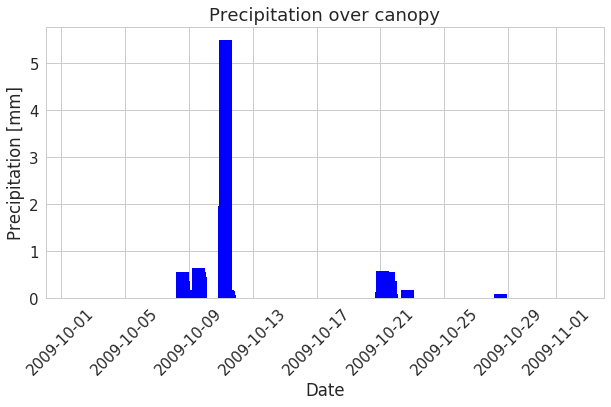

In [9]:
# create the plot space upon which to plot the data
fig, ax= plt.subplots(figsize = (10,5))

# add the x-axis and the y-axis to the plot
ax.bar(point_df_datetime.index, # or boulder_july_datetime.index.values
        point_df_datetime['Prain_over_canopy[mm]'], 
        color = 'blue')

# rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45)

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation [mm]",
       title="Precipitation over canopy");

### Short Wave Radiation

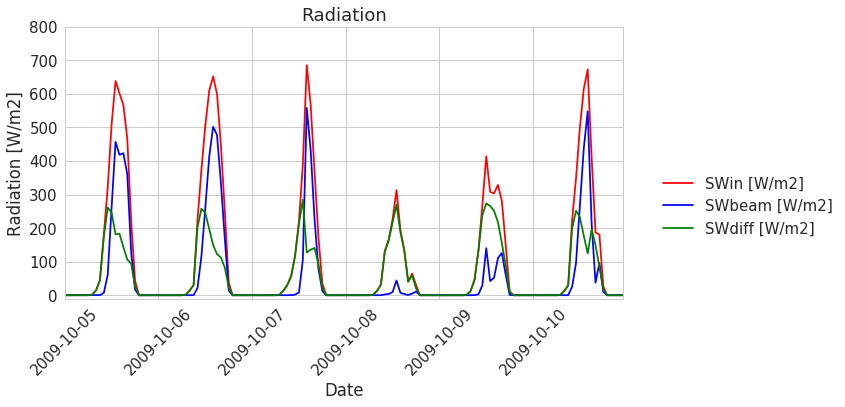

In [10]:
# create the plot space upon which to plot the data
fig, ax= plt.subplots(figsize = (10,5))

# add the x-axis and the y-axis to the plot
ax.plot(point_df_datetime.index, # or point_df_datetime.index.values
        point_df_datetime['SWin[W/m2]'], 
        color = 'red')
ax.plot(point_df_datetime.index, # or point_df_datetime.index.values
        point_df_datetime['SWbeam[W/m2]'], 
        color = 'blue')
ax.plot(point_df_datetime.index, # or point_df_datetime.index.values
        point_df_datetime['SWdiff[W/m2]'], 
        color = 'green')

# rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45)
plt.legend(['SWin [W/m2]', 'SWbeam [W/m2]', 'SWdiff [W/m2]'], 
           loc='upper right', bbox_to_anchor=(1.4,0.5), fontsize=15)

# set title and labels for axes
ax.set(xlabel = "Date",
       ylabel = "Radiation [W/m2]",
       ylim = [-10, 800],
       xlim = (pd.Timestamp('2009-10-05 00:00'), pd.Timestamp('2009-10-10 23:00')),
       title = "Radiation"); # to avoid text before the pic

## Load input data

### meteo0001.txt

In [11]:
meteo_file_path = "/home/elisa/Scrivania/MHPC/geotop_3.0/tests/3D/small_example/meteo/meteo0001.txt"

# import file into pandas dataframe
meteo_df = pd.read_csv(meteo_file_path)

# view first few rows of the data`
meteo_df.head()

,Date,Iprec,WindSp,WindDir,RH,AirT,Swglob,CloudTrans
0,01/10/2011 01:00,0.0,0.1,270.0,90.0,7.4,0.0,-9999.0
1,01/10/2011 02:00,0.0,0.1,270.0,91.0,6.9,0.0,-9999.0
2,01/10/2011 03:00,0.0,0.2,247.5,92.0,6.7,0.0,-9999.0
3,01/10/2011 04:00,0.0,0.2,292.5,92.0,6.5,0.0,-9999.0
4,01/10/2011 05:00,0.0,0.3,270.0,92.0,6.1,0.0,-9999.0


In [12]:
# import file into pandas dataframe, identifying the date column to be converted to datetime
meteo_df_datetime = pd.read_csv(meteo_file_path,
                                parse_dates = ['Date'], # Date format is correct
                                index_col = ['Date'], # No more element indexes
                                dayfirst = True,
                                na_values=['-9999'])

meteo_df_datetime.head() 

,Iprec,WindSp,WindDir,RH,AirT,Swglob,CloudTrans
Date,,,,,,,
2011-10-01 01:00:00,0.0,0.1,270.0,90.0,7.4,0.0,NaN
2011-10-01 02:00:00,0.0,0.1,270.0,91.0,6.9,0.0,NaN
2011-10-01 03:00:00,0.0,0.2,247.5,92.0,6.7,0.0,NaN
2011-10-01 04:00:00,0.0,0.2,292.5,92.0,6.5,0.0,NaN
2011-10-01 05:00:00,0.0,0.3,270.0,92.0,6.1,0.0,NaN


In [13]:
# calculate mean of columns in dataframe
meteo_df_datetime.describe()

,Iprec,WindSp,WindDir,RH,AirT,Swglob,CloudTrans
count,4224.000000,4224.000000,4220.000000,4224.000000,4224.000000,4093.000000,3522.000000
mean,0.084470,0.972704,148.404858,71.713778,-0.069389,93.263376,0.660786
std,0.580091,1.066945,91.691542,20.242965,6.428674,173.236360,0.276715
min,0.000000,0.000000,0.000000,12.000000,-18.100000,0.000000,0.100000
25%,0.000000,0.200000,67.500000,57.000000,-4.000000,0.000000,0.446019
50%,0.000000,0.500000,90.000000,77.000000,-0.600000,0.000000,0.719714
75%,0.000000,1.300000,247.500000,89.000000,3.800000,105.000000,0.905530
max,9.200000,6.800000,337.500000,100.000000,21.600000,816.000000,1.000000


## Subset time series

In [14]:
meteo_df_datetime.tail()

,Iprec,WindSp,WindDir,RH,AirT,Swglob,CloudTrans
Date,,,,,,,
2012-03-25 20:00:00,0.0,0.3,292.5,62.0,3.6,0.0,NaN
2012-03-25 21:00:00,0.0,0.3,67.5,70.0,2.0,0.0,NaN
2012-03-25 22:00:00,0.0,0.3,270.0,71.0,1.6,0.0,NaN
2012-03-25 23:00:00,0.0,0.3,292.5,72.0,0.9,0.0,NaN
2012-03-26 00:00:00,0.0,0.3,90.0,75.0,0.4,0.0,NaN


In [15]:
# below you subset all of the data for 2011
meteo_df_datetime['2011'].tail()

,Iprec,WindSp,WindDir,RH,AirT,Swglob,CloudTrans
Date,,,,,,,
2011-12-31 19:00:00,0.0,0.8,67.5,68.0,-4.7,0.0,NaN
2011-12-31 20:00:00,0.0,0.6,45.0,71.0,-5.1,0.0,NaN
2011-12-31 21:00:00,0.0,0.3,67.5,76.0,-5.9,0.0,NaN
2011-12-31 22:00:00,0.0,0.7,67.5,78.0,-6.3,0.0,NaN
2011-12-31 23:00:00,0.0,0.5,45.0,80.0,-7.3,0.0,NaN


In [16]:
# you can subset this way (First 6 hours of 01/12/2011)
meteo_df_datetime['2011-12-01 00:00':'2011-12-01 06:00'] 

,Iprec,WindSp,WindDir,RH,AirT,Swglob,CloudTrans
Date,,,,,,,
2011-12-01 00:00:00,0.0,0.0,202.5,69.0,-2.3,0.0,0.516487
2011-12-01 01:00:00,0.0,0.2,67.5,70.0,-2.7,0.0,0.481361
2011-12-01 02:00:00,0.0,0.1,45.0,71.0,-2.8,0.0,0.446235
2011-12-01 03:00:00,0.0,0.0,45.0,71.0,-3.1,0.0,0.411109
2011-12-01 04:00:00,0.0,0.1,90.0,72.0,-3.1,0.0,0.375982
2011-12-01 05:00:00,0.0,0.1,90.0,72.0,-3.2,0.0,0.340856
2011-12-01 06:00:00,0.0,0.1,270.0,71.0,-3.3,0.0,0.305730


In [17]:
# subset the data to a date range: November-December 2011 
meteo_df_datetime_NovDec = meteo_df_datetime['2011-11-01':'2011-12-31']

# print start and end date
print(meteo_df_datetime_NovDec.index.min())
print(meteo_df_datetime_NovDec.index.max())

2011-11-01 00:00:00
2011-12-31 23:00:00


In [18]:
# print min and max values of the input parameters
print(" --------- MIN values ---------")
print(meteo_df_datetime_NovDec.min(),"\n")

print(" --------- MAX values ---------")
print(meteo_df_datetime_NovDec.max())

 --------- MIN values ---------
Iprec          0.0
WindSp         0.0
WindDir        0.0
RH            25.0
AirT         -13.8
Swglob         0.0
CloudTrans     0.1
dtype: float64 

 --------- MAX values ---------
Iprec           5.2
WindSp          4.5
WindDir       337.5
RH             98.0
AirT           11.2
Swglob        535.0
CloudTrans      1.0
dtype: float64
